In [32]:
from slices.core import SLICES
from pymatgen.core.structure import Structure

# Load crystal structure from file
original_structure = Structure.from_file(filename='./yyh/mp-5239.cif')
backend = SLICES()

# Convert to SLICES string
slices_NdSiRu = backend.structure2SLICES(original_structure)

# Reconstruct crystal and get predicted energy
reconstructed_structure, final_energy_per_atom = backend.SLICES2structure(slices_NdSiRu)

print('SLICES string of NdSiRu is:', slices_NdSiRu)
print('Reconstructed structure:', reconstructed_structure)
print('Final energy per atom:', final_energy_per_atom, 'eV/atom')

/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:4021: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  r1 = _get_radius(structure[n])
/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:4023: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  r2 = _get_radius(entry["site"])
/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:3935: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  nn_data = self.get_nn_data(structure, n)


SLICES string of NdSiRu is: Nd Nd Si Si Ru Ru 0 5 -oo 0 5 ooo 0 4 o+o 0 4 ooo 0 3 -+o 0 3 -oo 0 3 ooo 0 3 o+o 0 2 ooo 1 5 oo+ 1 5 o-+ 1 4 oo+ 1 4 +o+ 1 2 ooo 1 2 o-o 1 2 +-o 1 2 +oo 1 3 ooo 2 4 oo+ 2 4 o++ 2 5 -o+ 2 5 oo+ 3 4 +oo 3 4 ooo 3 5 o-o 3 5 ooo 
Reconstructed structure: Full Formula (Nd2 Si2 Ru2)
Reduced Formula: NdSiRu
abc   :   4.225838   4.225831   7.004508
angles:  89.999437  89.999408  90.000143
pbc   :       True       True       True
Sites (6)
  #  SP            a          b          c      magmom
---  ----  ---------  ---------  ---------  ----------
  0  Nd     2e-06      2e-06      0.081344  0.0111948
  1  Nd     0.50001    0.500011   0.418371  0.0113577
  2  Si     1.5e-05    1.5e-05    0.581542  0.0187361
  3  Si    -0.499993  -0.499993  -0.087405  0.0190672
  4  Ru     9e-06     -0.499989  -0.249455  0.00576435
  5  Ru    -0.499989   1e-05     -0.249455  0.00576442
Final energy per atom: -7.243696212768555 eV/atom


In [34]:
from slices.core import SLICES
from pymatgen.core.structure import Structure

# Load crystal structure
original_structure = Structure.from_file(filename='/crystal/yyh/mp-559909.cif')
backend = SLICES(graph_method='econnn')

# Generate augmented SLICES
slices_list = backend.structure2SLICESAug_atom_order(structure=original_structure, num=50)
canonical_slices = list(set(backend.get_canonical_SLICES(s) for s in slices_list))

print('Unique Canonical SLICES:', len(canonical_slices))

Unique Canonical SLICES: 1


# 生产slices，并且标记失败案例

In [3]:
import os
import json
from pymatgen.core.structure import Structure
from slices.core import SLICES
from tqdm import tqdm
import random

def add_slices_to_jsonl(input_file, output_file, cif_dir):
    backend = SLICES()
    with open(input_file, 'r', encoding='utf-8') as fin, \
         open(output_file, 'w', encoding='utf-8') as fout:
        for i,line in enumerate(tqdm(fin, desc=f'Processing {os.path.basename(input_file)}')):
            record = json.loads(line.strip())
            xrd_file = record.get('xrd')
            if not xrd_file:
                print(f"未找到xrd字段")
                # 报错，停止运行
                print(f"错误行号: {i+1}")
                raise ValueError("xrd字段缺失")
                break

            cif_name = xrd_file.replace('.json', '.cif')
            cif_path = os.path.join(cif_dir, cif_name)
            if not os.path.isfile(cif_path):
                print(f"未找到cif文件: {cif_path}")
                # 报错，停止运行
                print(f"错误行号: {i+1}")
                raise ValueError("cif字段缺失")
                break
            
            try:
                structure = Structure.from_file(cif_path)
                slices_str = backend.structure2SLICES(structure)
                record['slices'] = slices_str
            except Exception as e:
                print(f"处理 {cif_path} 时出错: {e}")
                # 报错，停止运行
                print(f"错误行号: {i+1}")
                raise ValueError("cif字段缺失")
                break
            
            fout.write(json.dumps(record, ensure_ascii=False) + '\n')

# 用法示例
if __name__ == "__main__":
    savepath = '/home/perm/workspace/data/'
    cif_dir = '/mnt/minio/battery/xrd/datasets/raw_data/mp_cif/'  # 假设cif文件都在这个目录
    input_file = savepath + 'MP_xrd_test_with_density.jsonl'
    output_file = savepath + 'MP_xrd_test_with_slices.jsonl'
    add_slices_to_jsonl(input_file, output_file, cif_dir)

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


Processing MP_xrd_test_with_density.jsonl: 0it [00:00, ?it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:4021: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  r1 = _get_radius(structure[n])
/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:4023: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  r2 = _get_radius(entry["site"])
/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:3935: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  nn_data = self.get_nn_data(structure, n)
Processing MP_xrd_test_with_density.jsonl: 17it [00:07,  2.69it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues enc

In [5]:
import json
import random

def test_slices_field(jsonl_file, sample_num=5, cif_dir=None):
    backend = SLICES()
    with open(jsonl_file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    samples = random.sample(lines, min(sample_num, len(lines)))
    for idx, line in enumerate(samples):
        record = json.loads(line.strip())
        if cif_dir:
            cif_path = os.path.join(cif_dir, record.get('xrd', '').replace('.json', '.cif'))
            if not os.path.isfile(cif_path):
                print(f"未找到cif文件: {cif_path}")
                # 报错，停止运行
                print(f"错误行号: {idx+1}")
                raise ValueError("cif字段缺失")
                break
            else:
                assert 'slices' in record, f"第{idx}条记录未包含slices字段"
                structure = Structure.from_file(cif_path)
                slices_str = backend.structure2SLICES(structure)
                if slices_str == record['slices']:
                    print(f"样本{idx}的slices字段正确")
                else:
                    print(f"样本{idx}的slices字段不匹配")
                    print(f"预期: {slices_str}")
                    print(f"实际: {record['slices']}")
        else: # 找不到cif_dir时报错停止
            raise ValueError("cif_dir参数不能为空")

# 用法示例
cif_dir = '/mnt/minio/battery/xrd/datasets/raw_data/mp_cif/'
test_slices_field('/home/perm/workspace/data/MP_xrd_test_with_slices.jsonl', sample_num=5, cif_dir=cif_dir)

/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:4021: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  r1 = _get_radius(structure[n])
/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:4023: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  r2 = _get_radius(entry["site"])
/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:3935: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  nn_data = self.get_nn_data(structure, n)


样本0的slices字段正确
样本1的slices字段正确
样本2的slices字段正确
样本3的slices字段正确
样本4的slices字段正确


/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]


In [ ]:
import os
import json
from pymatgen.core.structure import Structure
from slices.core import SLICES
from tqdm import tqdm
import random

def add_slices_to_jsonl(input_file, output_file, cif_dir):
    backend = SLICES()
    wrong_cif_lines = [0, 8750]
    with open(input_file, 'r', encoding='utf-8') as fin, \
         open(output_file, 'a', encoding='utf-8') as fout:
        for i,line in enumerate(tqdm(fin, desc=f'Processing {os.path.basename(input_file)}')):
            record = json.loads(line.strip())

            if i+1 <= max(wrong_cif_lines):
                print(f"跳过已完成: {i+1}")
                continue
            
            xrd_file = record.get('xrd')
            if not xrd_file:
                print(f"未找到xrd字段")
                # 报错，停止运行
                print(f"错误行号: {i+1}")
                raise ValueError("xrd字段缺失")
                break

            cif_name = xrd_file.replace('.json', '.cif')
            cif_path = os.path.join(cif_dir, cif_name)
            if not os.path.isfile(cif_path):
                print(f"未找到cif文件: {cif_path}")
                # 报错，停止运行
                print(f"错误行号: {i+1}")
                raise ValueError("cif文件缺失")
                break
            
            try:
                structure = Structure.from_file(cif_path)
                slices_str = backend.structure2SLICES(structure)
                record['slices'] = slices_str
            except Exception as e:
                print(f"处理 {cif_path} 时出错: {e}")
                # 报错，停止运行
                print(f"错误行号: {i+1}")
                wrong_cif_lines.append(i+1)
                continue
            
            fout.write(json.dumps(record, ensure_ascii=False) + '\n')

    # 输出所有错误行号
    if wrong_cif_lines:
        print(f"以下行的cif文件缺失: {wrong_cif_lines}")

# 用法示例
if __name__ == "__main__":
    savepath = '/home/perm/workspace/data/'
    cif_dir = '/mnt/minio/battery/xrd/datasets/raw_data/mp_cif/'  # 假设cif文件都在这个目录
    input_file = savepath + 'MP_xrd_train_with_density.jsonl'
    output_file = savepath + 'MP_xrd_train_with_slices.jsonl'
    add_slices_to_jsonl(input_file, output_file, cif_dir)

Processing MP_xrd_train_with_density.jsonl: 5733it [00:00, 57321.85it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:4021: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  r1 = _get_radius(structure[n])
/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:4023: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  r2 = _get_radius(entry["site"])
/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:3935: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  nn_data = self.get_nn_data(structure, n)


跳过已完成: 1
跳过已完成: 2
跳过已完成: 3
跳过已完成: 4
跳过已完成: 5
跳过已完成: 6
跳过已完成: 7
跳过已完成: 8
跳过已完成: 9
跳过已完成: 10
跳过已完成: 11
跳过已完成: 12
跳过已完成: 13
跳过已完成: 14
跳过已完成: 15
跳过已完成: 16
跳过已完成: 17
跳过已完成: 18
跳过已完成: 19
跳过已完成: 20
跳过已完成: 21
跳过已完成: 22
跳过已完成: 23
跳过已完成: 24
跳过已完成: 25
跳过已完成: 26
跳过已完成: 27
跳过已完成: 28
跳过已完成: 29
跳过已完成: 30
跳过已完成: 31
跳过已完成: 32
跳过已完成: 33
跳过已完成: 34
跳过已完成: 35
跳过已完成: 36
跳过已完成: 37
跳过已完成: 38
跳过已完成: 39
跳过已完成: 40
跳过已完成: 41
跳过已完成: 42
跳过已完成: 43
跳过已完成: 44
跳过已完成: 45
跳过已完成: 46
跳过已完成: 47
跳过已完成: 48
跳过已完成: 49
跳过已完成: 50
跳过已完成: 51
跳过已完成: 52
跳过已完成: 53
跳过已完成: 54
跳过已完成: 55
跳过已完成: 56
跳过已完成: 57
跳过已完成: 58
跳过已完成: 59
跳过已完成: 60
跳过已完成: 61
跳过已完成: 62
跳过已完成: 63
跳过已完成: 64
跳过已完成: 65
跳过已完成: 66
跳过已完成: 67
跳过已完成: 68
跳过已完成: 69
跳过已完成: 70
跳过已完成: 71
跳过已完成: 72
跳过已完成: 73
跳过已完成: 74
跳过已完成: 75
跳过已完成: 76
跳过已完成: 77
跳过已完成: 78
跳过已完成: 79
跳过已完成: 80
跳过已完成: 81
跳过已完成: 82
跳过已完成: 83
跳过已完成: 84
跳过已完成: 85
跳过已完成: 86
跳过已完成: 87
跳过已完成: 88
跳过已完成: 89
跳过已完成: 90
跳过已完成: 91
跳过已完成: 92
跳过已完成: 93
跳过已完成: 94
跳过已完成: 95
跳过已完成: 96
跳过已完成: 97
跳过已完成: 98
跳过已完成: 99
跳过已完成: 100
跳过已完成: 1

/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]
/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 12 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]
Processing MP_xrd_train_with_density.jsonl: 8805it [00:30, 193.09it/s]  /opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 1 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]
/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/stru

处理 /mnt/minio/battery/xrd/datasets/raw_data/mp_cif/mp-1247838.cif 时出错: No Voronoi neighbors found for site - try increasing cutoff
错误行号: 21247


Processing MP_xrd_train_with_density.jsonl: 21297it [1:48:57,  2.84it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 15 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]
Processing MP_xrd_train_with_density.jsonl: 22005it [1:53:44,  3.04it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 22 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]
Processing MP_xrd_train_with_density.jsonl: 22229it [1:55:11,  4.17it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 80 fractional coordinates rounded to ideal values to avoid issues with fin

处理 /mnt/minio/battery/xrd/datasets/raw_data/mp_cif/mp-1212347.cif 时出错: No Voronoi neighbors found for site - try increasing cutoff
错误行号: 33653


Processing MP_xrd_train_with_density.jsonl: 33818it [3:10:48,  3.06it/s]

处理 /mnt/minio/battery/xrd/datasets/raw_data/mp_cif/mp-994911.cif 时出错: No Voronoi neighbors found for site - try increasing cutoff
错误行号: 33819


Processing MP_xrd_train_with_density.jsonl: 34471it [3:15:05,  3.48it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/io/cif.py:1314: UserWarning: Incorrect stoichiometry:
  CIF={'Mg': 4.0, 'Ti': 6.0, 'Cr': 2.0, 'S': 16.0}
  PMG={'Mg': 4.0, 'Ti': 12.0, 'Cr': 4.0, 'S': 16.0}
  ratios={'Mg': 1.0, 'Cr': 2.0, 'Ti': 2.0, 'S': 1.0}
  if struct := self._get_structure(data, primitive, symmetrized, check_occu=check_occu):
Processing MP_xrd_train_with_density.jsonl: 34478it [3:15:07,  3.23it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/io/cif.py:1314: UserWarning: Incorrect stoichiometry:
  CIF={'La': 4.0, 'Fe': 4.0, 'O': 12.0}
  PMG={'La': 8.0, 'Fe': 8.0, 'O': 16.0}
  ratios={'La': 2.0, 'O': 1.3333333333333333, 'Fe': 2.0}
  if struct := self._get_structure(data, primitive, symmetrized, check_occu=check_occu):
Processing MP_xrd_train_with_density.jsonl: 35158it [3:19:28,  4.92it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.p

处理 /mnt/minio/battery/xrd/datasets/raw_data/mp_cif/mp-1214815.cif 时出错: No Voronoi neighbors found for site - try increasing cutoff
错误行号: 36589


Processing MP_xrd_train_with_density.jsonl: 37669it [3:36:40,  2.28it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/io/cif.py:1314: UserWarning: Incorrect stoichiometry:
  CIF={'Sr': 16.0, 'Ta': 8.0, 'Mn': 8.0, 'O': 48.0}
  PMG={'Sr': 20.0, 'Ta': 10.0, 'Mn': 12.0, 'O': 52.0}
  ratios={'Ta': 1.25, 'Mn': 1.5, 'O': 1.0833333333333333, 'Sr': 1.25}
  if struct := self._get_structure(data, primitive, symmetrized, check_occu=check_occu):
Processing MP_xrd_train_with_density.jsonl: 38070it [3:39:10,  2.66it/s]

处理 /mnt/minio/battery/xrd/datasets/raw_data/mp_cif/mp-1182772.cif 时出错: No Voronoi neighbors found for site - try increasing cutoff
错误行号: 8750

In [9]:
import os
import json
from pymatgen.core.structure import Structure
from slices.core import SLICES
from tqdm import tqdm
import random

def add_slices_to_jsonl(input_file, output_file, cif_dir):
    backend = SLICES()
    wrong_cif_lines = [0, 8750, 36589]
    with open(input_file, 'r', encoding='utf-8') as fin, \
         open(output_file, 'a', encoding='utf-8') as fout:
        for i,line in enumerate(tqdm(fin, desc=f'Processing {os.path.basename(input_file)}')):
            record = json.loads(line.strip())

            if i+1 <= max(wrong_cif_lines):
                print(f"跳过已完成: {i+1}")
                continue
            
            xrd_file = record.get('xrd')
            if not xrd_file:
                print(f"未找到xrd字段")
                # 报错，停止运行
                print(f"错误行号: {i+1}")
                raise ValueError("xrd字段缺失")
                break

            cif_name = xrd_file.replace('.json', '.cif')
            cif_path = os.path.join(cif_dir, cif_name)
            if not os.path.isfile(cif_path):
                print(f"未找到cif文件: {cif_path}")
                # 报错，停止运行
                print(f"错误行号: {i+1}")
                raise ValueError("cif文件缺失")
                break
            
            try:
                structure = Structure.from_file(cif_path)
                slices_str = backend.structure2SLICES(structure)
                record['slices'] = slices_str
            except Exception as e:
                print(f"处理 {cif_path} 时出错: {e}")
                # 报错，停止运行
                print(f"错误行号: {i+1}")
                wrong_cif_lines.append(i+1)
                continue
            
            fout.write(json.dumps(record, ensure_ascii=False) + '\n')

    # 输出所有错误行号
    if wrong_cif_lines:
        print(f"以下行的cif文件缺失: {wrong_cif_lines}")

# 用法示例
if __name__ == "__main__":
    savepath = '/home/perm/workspace/data/'
    cif_dir = '/mnt/minio/battery/xrd/datasets/raw_data/mp_cif/'  # 假设cif文件都在这个目录
    input_file = savepath + 'MP_xrd_train_with_density.jsonl'
    output_file = savepath + 'MP_xrd_train_with_slices.jsonl'
    add_slices_to_jsonl(input_file, output_file, cif_dir)

Processing MP_xrd_train_with_density.jsonl: 6408it [00:00, 61515.20it/s]

跳过已完成: 1
跳过已完成: 2
跳过已完成: 3
跳过已完成: 4
跳过已完成: 5
跳过已完成: 6
跳过已完成: 7
跳过已完成: 8
跳过已完成: 9
跳过已完成: 10
跳过已完成: 11
跳过已完成: 12
跳过已完成: 13
跳过已完成: 14
跳过已完成: 15
跳过已完成: 16
跳过已完成: 17
跳过已完成: 18
跳过已完成: 19
跳过已完成: 20
跳过已完成: 21
跳过已完成: 22
跳过已完成: 23
跳过已完成: 24
跳过已完成: 25
跳过已完成: 26
跳过已完成: 27
跳过已完成: 28
跳过已完成: 29
跳过已完成: 30
跳过已完成: 31
跳过已完成: 32
跳过已完成: 33
跳过已完成: 34
跳过已完成: 35
跳过已完成: 36
跳过已完成: 37
跳过已完成: 38
跳过已完成: 39
跳过已完成: 40
跳过已完成: 41
跳过已完成: 42
跳过已完成: 43
跳过已完成: 44
跳过已完成: 45
跳过已完成: 46
跳过已完成: 47
跳过已完成: 48
跳过已完成: 49
跳过已完成: 50
跳过已完成: 51
跳过已完成: 52
跳过已完成: 53
跳过已完成: 54
跳过已完成: 55
跳过已完成: 56
跳过已完成: 57
跳过已完成: 58
跳过已完成: 59
跳过已完成: 60
跳过已完成: 61
跳过已完成: 62
跳过已完成: 63
跳过已完成: 64
跳过已完成: 65
跳过已完成: 66
跳过已完成: 67
跳过已完成: 68
跳过已完成: 69
跳过已完成: 70
跳过已完成: 71
跳过已完成: 72
跳过已完成: 73
跳过已完成: 74
跳过已完成: 75
跳过已完成: 76
跳过已完成: 77
跳过已完成: 78
跳过已完成: 79
跳过已完成: 80
跳过已完成: 81
跳过已完成: 82
跳过已完成: 83
跳过已完成: 84
跳过已完成: 85
跳过已完成: 86
跳过已完成: 87
跳过已完成: 88
跳过已完成: 89
跳过已完成: 90
跳过已完成: 91
跳过已完成: 92
跳过已完成: 93
跳过已完成: 94
跳过已完成: 95
跳过已完成: 96
跳过已完成: 97
跳过已完成: 98
跳过已完成: 99
跳过已完成: 100
跳过已完成: 1

Processing MP_xrd_train_with_density.jsonl: 21529it [00:00, 69185.26it/s]

跳过已完成: 10701
跳过已完成: 10702
跳过已完成: 10703
跳过已完成: 10704
跳过已完成: 10705
跳过已完成: 10706
跳过已完成: 10707
跳过已完成: 10708
跳过已完成: 10709
跳过已完成: 10710
跳过已完成: 10711
跳过已完成: 10712
跳过已完成: 10713
跳过已完成: 10714
跳过已完成: 10715
跳过已完成: 10716
跳过已完成: 10717
跳过已完成: 10718
跳过已完成: 10719
跳过已完成: 10720
跳过已完成: 10721
跳过已完成: 10722
跳过已完成: 10723
跳过已完成: 10724
跳过已完成: 10725
跳过已完成: 10726
跳过已完成: 10727
跳过已完成: 10728
跳过已完成: 10729
跳过已完成: 10730
跳过已完成: 10731
跳过已完成: 10732
跳过已完成: 10733
跳过已完成: 10734
跳过已完成: 10735
跳过已完成: 10736
跳过已完成: 10737
跳过已完成: 10738
跳过已完成: 10739
跳过已完成: 10740
跳过已完成: 10741
跳过已完成: 10742
跳过已完成: 10743
跳过已完成: 10744
跳过已完成: 10745
跳过已完成: 10746
跳过已完成: 10747
跳过已完成: 10748
跳过已完成: 10749
跳过已完成: 10750
跳过已完成: 10751
跳过已完成: 10752
跳过已完成: 10753
跳过已完成: 10754
跳过已完成: 10755
跳过已完成: 10756
跳过已完成: 10757
跳过已完成: 10758
跳过已完成: 10759
跳过已完成: 10760
跳过已完成: 10761
跳过已完成: 10762
跳过已完成: 10763
跳过已完成: 10764
跳过已完成: 10765
跳过已完成: 10766
跳过已完成: 10767
跳过已完成: 10768
跳过已完成: 10769
跳过已完成: 10770
跳过已完成: 10771
跳过已完成: 10772
跳过已完成: 10773
跳过已完成: 10774
跳过已完成: 10775
跳过已完成: 10776
跳过已完成: 10777

Processing MP_xrd_train_with_density.jsonl: 36299it [00:00, 71634.21it/s]

跳过已完成: 27066
跳过已完成: 27067
跳过已完成: 27068
跳过已完成: 27069
跳过已完成: 27070
跳过已完成: 27071
跳过已完成: 27072
跳过已完成: 27073
跳过已完成: 27074
跳过已完成: 27075
跳过已完成: 27076
跳过已完成: 27077
跳过已完成: 27078
跳过已完成: 27079
跳过已完成: 27080
跳过已完成: 27081
跳过已完成: 27082
跳过已完成: 27083
跳过已完成: 27084
跳过已完成: 27085
跳过已完成: 27086
跳过已完成: 27087
跳过已完成: 27088
跳过已完成: 27089
跳过已完成: 27090
跳过已完成: 27091
跳过已完成: 27092
跳过已完成: 27093
跳过已完成: 27094
跳过已完成: 27095
跳过已完成: 27096
跳过已完成: 27097
跳过已完成: 27098
跳过已完成: 27099
跳过已完成: 27100
跳过已完成: 27101
跳过已完成: 27102
跳过已完成: 27103
跳过已完成: 27104
跳过已完成: 27105
跳过已完成: 27106
跳过已完成: 27107
跳过已完成: 27108
跳过已完成: 27109
跳过已完成: 27110
跳过已完成: 27111
跳过已完成: 27112
跳过已完成: 27113
跳过已完成: 27114
跳过已完成: 27115
跳过已完成: 27116
跳过已完成: 27117
跳过已完成: 27118
跳过已完成: 27119
跳过已完成: 27120
跳过已完成: 27121
跳过已完成: 27122
跳过已完成: 27123
跳过已完成: 27124
跳过已完成: 27125
跳过已完成: 27126
跳过已完成: 27127
跳过已完成: 27128
跳过已完成: 27129
跳过已完成: 27130
跳过已完成: 27131
跳过已完成: 27132
跳过已完成: 27133
跳过已完成: 27134
跳过已完成: 27135
跳过已完成: 27136
跳过已完成: 27137
跳过已完成: 27138
跳过已完成: 27139
跳过已完成: 27140
跳过已完成: 27141
跳过已完成: 27142

/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:4021: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  r1 = _get_radius(structure[n])
/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:4023: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  r2 = _get_radius(entry["site"])
/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/analysis/local_env.py:3935: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  nn_data = self.get_nn_data(structure, n)
/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = 

处理 /mnt/minio/battery/xrd/datasets/raw_data/mp_cif/mp-1101037.cif 时出错: No Voronoi neighbors found for site - try increasing cutoff
错误行号: 67678


Processing MP_xrd_train_with_density.jsonl: 68011it [3:12:58,  3.71it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 172 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]
Processing MP_xrd_train_with_density.jsonl: 69029it [3:19:17,  3.76it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 39 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]
Processing MP_xrd_train_with_density.jsonl: 69032it [3:19:18,  2.66it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/io/cif.py:1314: UserWarning: Incorrect stoichiometry:
  CIF={'Ti': 24.0, 'Al': 2.0, 'Si': 6.0, 'C': 16.0}
  PMG={'Ti': 24.0, 'Al': 4.0, 'Si': 12.0, 

处理 /mnt/minio/battery/xrd/datasets/raw_data/mp_cif/mp-1182718.cif 时出错: No Voronoi neighbors found for site - try increasing cutoff
错误行号: 72561


Processing MP_xrd_train_with_density.jsonl: 73652it [3:47:57,  2.05it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/io/cif.py:1314: UserWarning: Incorrect stoichiometry:
  CIF={'Li': 8.0, 'Fe': 8.0, 'C': 12.0, 'O': 36.0}
  PMG={'Li': 8.0, 'Fe': 12.0, 'C': 18.0, 'O': 44.0}
  ratios={'Li': 1.0, 'C': 1.5, 'O': 1.2222222222222223, 'Fe': 1.5}
  if struct := self._get_structure(data, primitive, symmetrized, check_occu=check_occu):
Processing MP_xrd_train_with_density.jsonl: 73969it [3:49:56,  3.83it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 26 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]
Processing MP_xrd_train_with_density.jsonl: 75063it [3:56:22,  1.89it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered whi

处理 /mnt/minio/battery/xrd/datasets/raw_data/mp_cif/mp-1215160.cif 时出错: No Voronoi neighbors found for site - try increasing cutoff
错误行号: 77393


Processing MP_xrd_train_with_density.jsonl: 77829it [4:13:06,  3.33it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/io/cif.py:1314: UserWarning: Incorrect stoichiometry:
  CIF={'Sr': 8.0, 'Y': 4.0, 'Mn': 4.0, 'Cu': 8.0, 'O': 28.0}
  PMG={'Sr': 8.0, 'Y': 4.0, 'Mn': 8.0, 'Cu': 8.0, 'O': 28.0}
  ratios={'Y': 1.0, 'Mn': 2.0, 'O': 1.0, 'Cu': 1.0, 'Sr': 1.0}
  if struct := self._get_structure(data, primitive, symmetrized, check_occu=check_occu):
Processing MP_xrd_train_with_density.jsonl: 78889it [4:19:32,  3.76it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 54 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]
Processing MP_xrd_train_with_density.jsonl: 80276it [4:27:44,  1.70it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/io/cif.py:1314: UserWarning: Incorrect stoic

处理 /mnt/minio/battery/xrd/datasets/raw_data/mp_cif/mp-1212042.cif 时出错: No Voronoi neighbors found for site - try increasing cutoff
错误行号: 81600


Processing MP_xrd_train_with_density.jsonl: 83349it [4:47:00,  1.89it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/io/cif.py:1314: UserWarning: Incorrect stoichiometry:
  CIF={'Bi': 6.0, 'Br': 2.0, 'O': 8.0}
  PMG={'Bi': 18.0, 'Br': 2.0, 'O': 16.0}
  ratios={'Br': 1.0, 'O': 2.0, 'Bi': 3.0}
  if struct := self._get_structure(data, primitive, symmetrized, check_occu=check_occu):
Processing MP_xrd_train_with_density.jsonl: 83829it [4:50:04,  2.85it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 64 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]
Processing MP_xrd_train_with_density.jsonl: 83988it [4:51:01,  4.85it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/io/cif.py:1314: UserWarning: Incorrect stoichiometry:
  CIF={'Na': 4.0, 'Fe': 8.0, 'O': 16.0}
  PMG={'Na': 

处理 /mnt/minio/battery/xrd/datasets/raw_data/mp_cif/mp-1215144.cif 时出错: No Voronoi neighbors found for site - try increasing cutoff
错误行号: 113906


Processing MP_xrd_train_with_density.jsonl: 115412it [8:02:18,  2.25it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 74 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]
Processing MP_xrd_train_with_density.jsonl: 115655it [8:03:40,  4.50it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 61 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]
Processing MP_xrd_train_with_density.jsonl: 116255it [8:07:14,  2.69it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/io/cif.py:1314: UserWarning: Incorrect stoichiometry:
  CIF={'Ca': 8.0, 'Si': 20.0, 'Pt': 12.0}
  PMG={'Ca': 16.0, 'Si': 42.0, 'Pt': 30.0}
  ratio

处理 /mnt/minio/battery/xrd/datasets/raw_data/mp_cif/mp-1210439.cif 时出错: No Voronoi neighbors found for site - try increasing cutoff
错误行号: 140995


Processing MP_xrd_train_with_density.jsonl: 142989it [10:47:46,  3.66it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/io/cif.py:1314: UserWarning: Incorrect stoichiometry:
  CIF={'Li': 6.0, 'Ni': 6.0, 'O': 12.0}
  PMG={'Li': 6.0, 'Ni': 12.0, 'O': 12.0}
  ratios={'Ni': 2.0, 'Li': 1.0, 'O': 1.0}
  if struct := self._get_structure(data, primitive, symmetrized, check_occu=check_occu):
Processing MP_xrd_train_with_density.jsonl: 145630it [11:03:59,  3.18it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/core/structure.py:3109: UserWarning: Issues encountered while parsing CIF: 38 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  struct = parser.parse_structures(primitive=primitive)[0]
Processing MP_xrd_train_with_density.jsonl: 146656it [11:10:24,  3.59it/s]/opt/miniconda/envs/umat/lib/python3.10/site-packages/pymatgen/io/cif.py:1314: UserWarning: Incorrect stoichiometry:
  CIF={'Li': 2.0, 'Ni': 3.0, 'Sn': 1.0, 'O': 8

以下行的cif文件缺失: [0, 8750, 36589, 67678, 72561, 77393, 81600, 113906, 140995]


In [10]:
import json

# 文件路径
train_with_density_path = '/home/perm/workspace/data/MP_xrd_train_with_density.jsonl'
train_with_slices_path = '/home/perm/workspace/data/MP_xrd_train_with_slices.jsonl'
output_path = '/home/perm/workspace/data/MP_xrd_train_with_slices_v1.jsonl'

# 1. 读取 MP_xrd_train_with_slices.jsonl，建立 xrd 到行号和内容的索引
xrd_to_lines = {}  # xrd: list of (line_num, line_content)
with open(train_with_slices_path, 'r', encoding='utf-8') as f:
    for idx, line in enumerate(f):
        data = json.loads(line)
        # 检查data里是否有 slices 字段，以确保是正确的文件。没有则报错停止。
        if 'slices' not in data or data['slices'] is None:
            print(f"错误行号: {idx+1}")
            raise ValueError("slices字段缺失")

        xrd = data.get('xrd')
        if xrd is not None:
            if xrd not in xrd_to_lines: # 初始化 xrd key的value 对应的列表
                xrd_to_lines[xrd] = []
            xrd_to_lines[xrd].append((idx, line))

# 2. 遍历 MP_xrd_train_with_density.jsonl，查找对应的 xrd 行号，并写入第一个匹配行到新文件
with open(train_with_density_path, 'r', encoding='utf-8') as density_f, \
     open(output_path, 'w', encoding='utf-8') as out_f:
    for line in density_f:
        data = json.loads(line)
        xrd = data.get('xrd')
        if xrd is not None and xrd in xrd_to_lines:
            # 记录所有行号
            line_nums = [item[0] for item in xrd_to_lines[xrd]]
            # print(f'xrd: {xrd}, line numbers in slices: {line_nums}')
            # 取第一个匹配行，写入新文件
            first_line = xrd_to_lines[xrd][0][1]
            out_f.write(first_line)
        else:
            print(f'xrd: {xrd} not found in slices file.')

# 如果你不需要打印行号，可以去掉 print 那一行。

xrd: mp-1182772.json not found in slices file.
xrd: mp-1247838.json not found in slices file.
xrd: mp-1212347.json not found in slices file.
xrd: mp-994911.json not found in slices file.
xrd: mp-1214815.json not found in slices file.
xrd: mp-1101037.json not found in slices file.
xrd: mp-1182718.json not found in slices file.
xrd: mp-1215160.json not found in slices file.
xrd: mp-1212042.json not found in slices file.
xrd: mp-1215144.json not found in slices file.
xrd: mp-1210439.json not found in slices file.


slices长度: 4, 数量: 5
slices长度: 5, 数量: 3
slices长度: 6, 数量: 5
slices长度: 7, 数量: 1
slices长度: 8, 数量: 4
slices长度: 9, 数量: 5
slices长度: 10, 数量: 7
slices长度: 11, 数量: 5
slices长度: 12, 数量: 9
slices长度: 13, 数量: 1
slices长度: 16, 数量: 1
slices长度: 18, 数量: 5
slices长度: 19, 数量: 1
slices长度: 20, 数量: 3
slices长度: 21, 数量: 5
slices长度: 22, 数量: 19
slices长度: 23, 数量: 2
slices长度: 24, 数量: 31
slices长度: 25, 数量: 3
slices长度: 26, 数量: 9
slices长度: 27, 数量: 14
slices长度: 28, 数量: 13
slices长度: 29, 数量: 4
slices长度: 30, 数量: 2
slices长度: 31, 数量: 6
slices长度: 32, 数量: 2
slices长度: 33, 数量: 4
slices长度: 34, 数量: 2
slices长度: 35, 数量: 7
slices长度: 36, 数量: 4
slices长度: 37, 数量: 3
slices长度: 38, 数量: 6
slices长度: 39, 数量: 6
slices长度: 40, 数量: 14
slices长度: 41, 数量: 10
slices长度: 42, 数量: 13
slices长度: 43, 数量: 10
slices长度: 44, 数量: 42
slices长度: 45, 数量: 18
slices长度: 46, 数量: 58
slices长度: 47, 数量: 34
slices长度: 48, 数量: 49
slices长度: 49, 数量: 2
slices长度: 50, 数量: 10
slices长度: 51, 数量: 2
slices长度: 52, 数量: 21
slices长度: 53, 数量: 45
slices长度: 54, 数量: 58
slices长度: 55, 数量: 46
slices长度

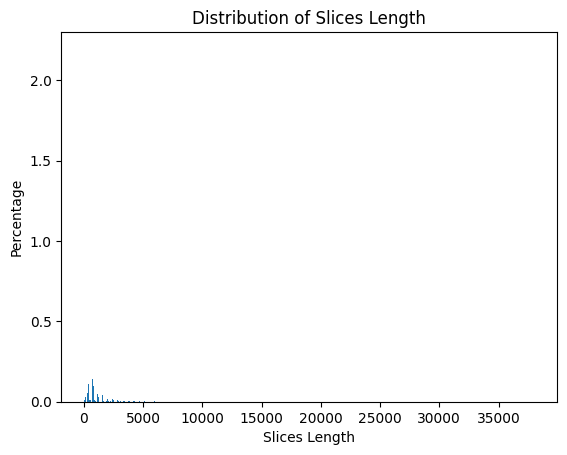

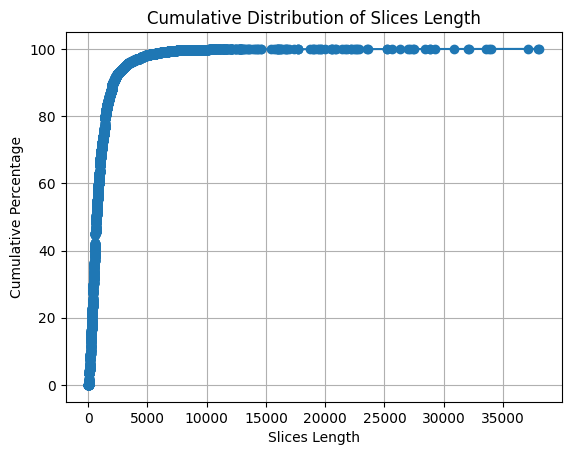

In [17]:
import json
from collections import Counter

train_with_slices_path = '/home/perm/workspace/data/MP_xrd_train_with_slices.jsonl'

length_counter = Counter()
with open(train_with_slices_path, 'r', encoding='utf-8') as f:
    for idx, line in enumerate(f):
        data = json.loads(line)
        slices_str = data.get('slices', '')
        length_counter[len(slices_str)] += 1

# 输出长度分布
for length, count in sorted(length_counter.items()):
    print(f'slices长度: {length}, 数量: {count}')
    
# 请画图，长度分布直方图，横坐标是长度，纵坐标是百分比
import matplotlib.pyplot as plt

# 计算总数
total_count = sum(length_counter.values())

# 计算百分比
lengths = []
percentages = []
for length, count in sorted(length_counter.items()):
    lengths.append(length)
    percentages.append(count / total_count * 100)

# 绘制直方图
plt.bar(lengths, percentages)
plt.xlabel('Slices Length')
plt.ylabel('Percentage')
plt.title('Distribution of Slices Length')
plt.show()

# 画一个accumulative的图
import numpy as np  
cumulative_percentages = np.cumsum(percentages)
plt.plot(lengths, cumulative_percentages, marker='o')
plt.xlabel('Slices Length')
plt.ylabel('Cumulative Percentage')
plt.title('Cumulative Distribution of Slices Length')
plt.grid()
plt.show()


In [14]:
# 输出最大长度
max_length = max(lengths)
print(f'最大 slices 长度: {max_length}')

# 输出最大概率
max_percentage = max(percentages)
print(f'最大 slices 长度的百分比: {max_percentage}%')

最大 slices 长度: 38056
最大 slices 长度的百分比: 2.190735620968179%


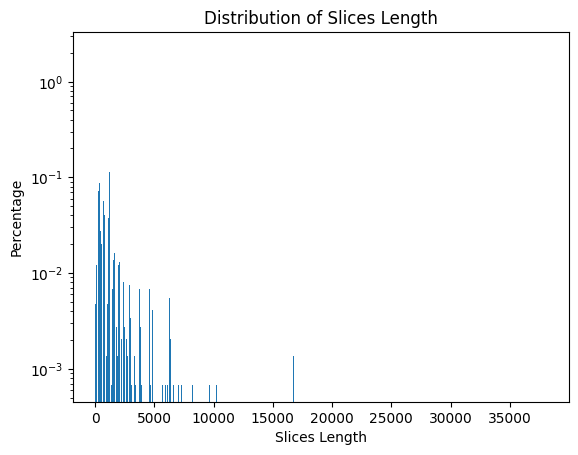

In [16]:
# 纵坐标的范围
# 横坐标范围
# plt.ylim(0, max(percentages) * 1.1)
# plt.xlim(0, max(lengths) * 1.1)
# 采用对数坐标
plt.yscale('log')   
plt.bar(lengths, percentages)
plt.xlabel('Slices Length')
plt.ylabel('Percentage')
plt.title('Distribution of Slices Length')
plt.show()